# Spark_Optimise_Task_3

In [25]:
# I need this library for geospatial operations
# !pip install apache-sedona
# pip install --upgrade pip
# pip install scikit-learn
# pip install pyspark
# pip install apache-sedona[spark]
# pip install apache-sedona

In [26]:
# Addin Sedona extensions to PySpark session
# pip show apache-sedona
# print(spark.version)

In [60]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import geopandas as gpd
import folium
import osmnx as ox

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, when, isnan, udf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from sedona.register.geo_registrator import SedonaRegistrator
from shapely.geometry import Polygon, Point
from shapely import wkt
from shapely.wkt import loads
from pyspark.sql.types import StructType, StructField, FloatType, StringType

In [28]:
# Convert Excel to CSV
# final_dataset = pd.read_excel(r'C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\task_3_dataset_enlarged.xlsx')
# final_dataset.to_csv(r'C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\task_3_dataset_enlarged.csv', index=False)

In [29]:
# import findspark
# findspark.init("C:\\Spark\\spark-3.5.2-bin-hadoop3")

In [30]:
"""from pyspark.sql import SparkSession
from sedona.register.geo_registrator import SedonaRegistrator

spark = SparkSession.builder \
    .appName("Sedona Test") \
    .config("spark.jars", "C:/Users/Камила/MyPythonProject/jars/sedona-sql-3.0_2.12-1.0.1-incubating.jar,C:/Users/Камила/MyPythonProject/jars/sedona-python-adapter-3.0_2.12-1.0.1-incubating.jar") \
    .getOrCreate()

# Register Sedona's SQL functions
SedonaRegistrator.registerAll(spark)"""

'from pyspark.sql import SparkSession\nfrom sedona.register.geo_registrator import SedonaRegistrator\n\nspark = SparkSession.builder     .appName("Sedona Test")     .config("spark.jars", "C:/Users/Камила/MyPythonProject/jars/sedona-sql-3.0_2.12-1.0.1-incubating.jar,C:/Users/Камила/MyPythonProject/jars/sedona-python-adapter-3.0_2.12-1.0.1-incubating.jar")     .getOrCreate()\n\n# Register Sedona\'s SQL functions\nSedonaRegistrator.registerAll(spark)'

In [31]:
"""# Create Spark session and register Sedona
spark = SparkSession.builder \
    .appName("Sedona Test") \
    .config("C:/Spark/spark-3.5.2-bin-hadoop3/jars", "C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-sql-3.0_2.12-1.0.1-incubating.jar, C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-python-adapter-3.0_2.12-1.0.1-incubating.jar") \
    .getOrCreate()

print("Spark session created successfully!")"""

'# Create Spark session and register Sedona\nspark = SparkSession.builder     .appName("Sedona Test")     .config("C:/Spark/spark-3.5.2-bin-hadoop3/jars", "C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-sql-3.0_2.12-1.0.1-incubating.jar, C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-python-adapter-3.0_2.12-1.0.1-incubating.jar")     .getOrCreate()\n\nprint("Spark session created successfully!")'

In [ ]:
"""from pyspark.sql import SparkSession

# Path to your CSV file
path = r'C:\Users\Камила\Downloads\ita_general_2020_csv\ita_general_2020.csv'

# Create SparkSession
spark = SparkSession.builder \
    .appName('ReadCSVExample') \
    .getOrCreate()

# Read the CSV file
df = spark.read.csv(path, inferSchema=True, header=True)

# Show the first few rows and schema
df.show(5)  # Displays the first 5 rows
df.printSchema()  # Displays the schema (column names and data types)"""


+------------------+-----------------+----------------+
|         longitude|         latitude|ita_general_2020|
+------------------+-----------------+----------------+
|  6.21569444459422|48.00013888887011|        1.061017|
| 6.216250000149777|48.00013888887011|        1.061017|
|6.2165277779275545|48.00013888887011|        1.061017|
| 6.243750000149799|48.00013888887011|        0.831058|
| 6.244027777927577|48.00013888887011|        0.831058|
+------------------+-----------------+----------------+
only showing top 5 rows

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- ita_general_2020: double (nullable = true)



Above code show the population density for Italy in all locations (from which we get the population density for our specific locations).

checking for pyspark working example + spark session creation:

In [33]:
from pyspark.sql import SparkSession
import os

# Ensure the correct Python executable paths
os.environ["PYSPARK_PYTHON"] = r"C:\Users\Камила\AppData\Local\Programs\Python\Python311\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = r"C:\Users\Камила\AppData\Local\Programs\Python\Python311\python.exe"

# Configure Spark session
spark = SparkSession.builder \
    .appName("PythonVersionFix") \
    .master("local[*]") \
    .config("spark.executorEnv.PYSPARK_PYTHON", r"C:\Users\Камила\AppData\Local\Programs\Python\Python311\python.exe") \
    .config("spark.executorEnv.PYSPARK_DRIVER_PYTHON", r"C:\Users\Камила\AppData\Local\Programs\Python\Python311\python.exe") \
    .getOrCreate()

"""# Test
data = [(1, "a"), (2, "b"), (3, "c")]
df = spark.createDataFrame(data, ["id", "value"])
df.show()"""

'# Test\ndata = [(1, "a"), (2, "b"), (3, "c")]\ndf = spark.createDataFrame(data, ["id", "value"])\ndf.show()'

Reading data excel provided by company:

In [34]:
# Load your dataset (assume it's a CSV)
final_dataset = spark.read.csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\task_3_dataset_enlarged.csv", header=True, inferSchema=True)

## Define grids

### Part 1. Polygon

In [36]:
# Function to create a 1km grid using Shapely
def create_1km_grid_py(lat, lon):
    km_in_degree = 0.5 / 110.574
    km_lon = 0.5 / (111.320 * np.cos(np.radians(lat)))
    return str(Polygon([
        (lon - km_lon, lat - km_in_degree),
        (lon - km_lon, lat + km_in_degree),
        (lon + km_lon, lat + km_in_degree),
        (lon + km_lon, lat - km_in_degree)
    ]))

# Register the UDF
grid_udf = udf(create_1km_grid_py)

# Apply the UDF to generate the grid polygons
final_dataset = final_dataset.withColumn("geometry", grid_udf(col("gpsLat"), col("gpsLong")))

<Axes: >

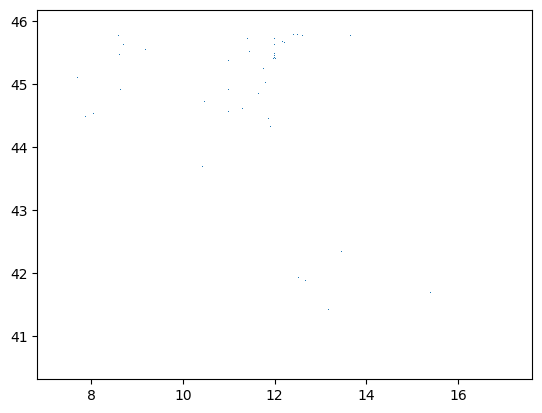

In [37]:
# Convert to GeoPandas for visualization
# Collect PySpark DataFrame to Pandas
final_dataset = final_dataset.toPandas()

# Convert the WKT column to Shapely geometries
final_dataset['geometry'] = final_dataset['geometry'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(final_dataset, geometry='geometry', crs="EPSG:4326")

# Plot the grid
gdf.plot()

In [38]:
# Define the function to create a 1km grid
def create_1km_grid(lat, lon):
    """Creates a 0.5km x 0.5km square grid around a given point (latitude, longitude)."""
    km_lat = 0.5 / 110.574  # degrees latitude per kilometer
    km_lon = 0.5 / (111.320 * np.cos(np.radians(lat)))  # degrees longitude per kilometer

    # Define the bounds of the square grid
    lat_min = lat - (km_lat / 2)
    lat_max = lat + (km_lat / 2)
    lon_min = lon - (km_lon / 2)
    lon_max = lon + (km_lon / 2)

    # Create a polygon
    square = Polygon([
        (lon_min, lat_min),
        (lon_min, lat_max),
        (lon_max, lat_max),
        (lon_max, lat_min),
        (lon_min, lat_min)
    ])
    return square.wkt  # Return WKT (Well-Known Text) format for PySpark compatibility

In [39]:
final_dataset['polygon'] = final_dataset.apply(lambda x: create_1km_grid(x['gpsLat'], x['gpsLong']), axis=1)

In [40]:
# Convert the 'polygon' column to Shapely objects
final_dataset['polygon'] = final_dataset['polygon'].apply(wkt.loads)

In [41]:
gdf = gpd.GeoDataFrame(final_dataset, geometry='polygon', crs="EPSG:4326")

In [42]:
print(type(final_dataset))

<class 'pandas.core.frame.DataFrame'>


In [43]:
print(final_dataset)

         location     gpsLat    gpsLong  \
0      Location 1  45.099342   7.708655   
1      Location 2  45.558440   9.240295   
2      Location 3  45.568602   9.363047   
3      Location 4  45.627761   8.712500   
4      Location 5  41.924079  12.516347   
..            ...        ...        ...   
128  Location 129  44.999790   9.302020   
129  Location 130  45.703120   8.583530   
130  Location 131  44.000000  12.481811   
131  Location 132  45.769533  13.646450   
132  Location 133  45.016987  11.798013   

                                              geometry  \
0    POLYGON ((7.702291931641269 45.094820171335215...   
1    POLYGON ((9.233880046157743 45.55391802752161,...   
2    POLYGON ((9.35663083966997 45.56408017245701, ...   
3    POLYGON ((8.70607698288634 45.62323919286701, ...   
4    POLYGON ((12.51031009485218 41.91955673782281,...   
..                                                 ...   
128  POLYGON ((9.295668004057807 44.995268041335216...   
129  POLYGON ((8.57

In [55]:
gdf = gdf.drop(columns=['geometry'])

In [44]:
# Remove the 'geometry' column from the DataFrame
final_dataset = final_dataset.drop(columns=['geometry'])

# Print the DataFrame to verify
print(final_dataset)

         location     gpsLat    gpsLong  \
0      Location 1  45.099342   7.708655   
1      Location 2  45.558440   9.240295   
2      Location 3  45.568602   9.363047   
3      Location 4  45.627761   8.712500   
4      Location 5  41.924079  12.516347   
..            ...        ...        ...   
128  Location 129  44.999790   9.302020   
129  Location 130  45.703120   8.583530   
130  Location 131  44.000000  12.481811   
131  Location 132  45.769533  13.646450   
132  Location 133  45.016987  11.798013   

                                               polygon  
0    POLYGON ((7.705473462320634 45.09708110066761,...  
1    POLYGON ((9.237087469141786 45.556178956854005...  
2    POLYGON ((9.35983884288598 45.566341101789405,...  
3    POLYGON ((8.709288370108236 45.625500122199405...  
4    POLYGON ((12.51332848853559 41.9218176671552, ...  
..                                                 ...  
128  POLYGON ((9.298844002028904 44.99752897066761,...  
129  POLYGON ((8.5803142867

converting pandas dataframe again to pyspark dataframe:

In [46]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

# Convert Shapely geometries to WKT in the Pandas DataFrame
final_dataset['polygon'] = final_dataset['polygon'].apply(lambda geom: geom.wkt)

# Define the schema for the PySpark DataFrame
schema = StructType([
    StructField("location", StringType(), True),
    StructField("gpsLat", DoubleType(), True),
    StructField("gpsLong", DoubleType(), True),
    StructField("polygon", StringType(), True)  # WKT representation of the geometry
])

# Convert Pandas DataFrame back to PySpark DataFrame
final_dataset = spark.createDataFrame(final_dataset, schema=schema)

# Show the PySpark DataFrame
final_dataset.show(truncate=False)

+-----------+----------------+----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|location   |gpsLat          |gpsLong         |polygon                                                                                                                                                                                                    |
+-----------+----------------+----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Location 1 |45.09934203     |7.708654993     |POLYGON ((7.705473462320634 45.09708110066761, 7.705473462320634 45.101602959332396, 7.711836523679366 45.101602959332396, 7.711836523679366 45.09708110066761, 7.705473462320634 45.09708110066761))

In [47]:
final_dataset.printSchema()

root
 |-- location: string (nullable = true)
 |-- gpsLat: double (nullable = true)
 |-- gpsLong: double (nullable = true)
 |-- polygon: string (nullable = true)



In [48]:
print(type(final_dataset))

<class 'pyspark.sql.dataframe.DataFrame'>


In [49]:
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [50]:
print(type(gdf['polygon']))

<class 'geopandas.geoseries.GeoSeries'>


In [56]:
# I will extract this csv, so that I can continue on that later without running everything above.
gdf.to_csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\polygon_data.csv", index=False)

### Part 2. EV_stations

# Above is Finished, redo from here

In [57]:
gdf = spark.read.csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\polygon_data.csv", header=True, inferSchema=True)

In [ ]:
# Load as a PySpark DataFrame
grid_spark.show()

In [21]:
from sedona.register.geo_registrator import SedonaRegistrator

In [41]:
spark.stop()
spark.sparkContext.stop()

In [24]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [4]:
from sedona.spark import SedonaContext

config = SedonaContext.builder().getOrCreate()

sedona = SedonaContext.create(config)

Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [26]:
from pyspark.sql import SparkSession
from sedona.register.geo_registrator import SedonaRegistrator

spark = SparkSession.builder \
    .appName("Sedona Test") \
    .config("C:\Spark\spark-3.5.2-bin-hadoop3\jars", 'C:\Spark\spark-3.5.2-bin-hadoop3\jars\sedona-spark-shaded-3.5_2.12:1.6.1.jar, C:\Spark\spark-3.5.2-bin-hadoop3\jars\geotools-wrapper:1.6.1-28.2.jar'
            ) \
    .getOrCreate()

In [28]:
from pyspark.sql import SparkSession
from sedona.register.geo_registrator import SedonaRegistrator

spark = SparkSession.builder \
    .appName("Sedona Test") \
    .config("spark.jars", 
            "C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-spark-shaded-3.5_2.12-1.6.1.jar,"
            "C:/Spark/spark-3.5.2-bin-hadoop3/jars/geotools-wrapper-1.6.1-28.2.jar") \
    .getOrCreate()

# Register Sedona's SQL functions
SedonaRegistrator.registerAll(spark)


C:\Users\Камила\AppData\Local\Temp\ipykernel_16364\3175786370.py:12: DeprecationWarning: Call to deprecated function registerAll (Deprecated since 1.4.1, use SedonaContext.create() instead.).
  SedonaRegistrator.registerAll(spark)


Py4JJavaError: An error occurred while calling z:org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator$.registerAll(SedonaSQLRegistrator.scala:34)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll(SedonaSQLRegistrator.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [27]:
# Register Sedona's SQL functions
SedonaRegistrator.registerAll(spark)

C:\Users\Камила\AppData\Local\Temp\ipykernel_16364\598618770.py:2: DeprecationWarning: Call to deprecated function registerAll (Deprecated since 1.4.1, use SedonaContext.create() instead.).
  SedonaRegistrator.registerAll(spark)


Py4JJavaError: An error occurred while calling z:org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator$.registerAll(SedonaSQLRegistrator.scala:34)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll(SedonaSQLRegistrator.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


example

In [2]:
spark.stop()
spark.sparkContext.stop()

NameError: name 'spark' is not defined

In [8]:
import geopandas as gpd
from sedona.spark import *

config = SedonaContext.builder().\
      getOrCreate()

sedona = SedonaContext.create(config)

gdf = gpd.read_file(r'C:\Users\Камила\Downloads\ita_general_2020_csv\ita_general_2020.csv')

sedona.createDataFrame(
  gdf
).show()

Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [7]:
import geopandas as gpd
from sedona.spark import *

config = SedonaContext.builder().\
      getOrCreate()

sedona = SedonaContext.create(config)

Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql.types import IntegerType, StructField, StructType

from sedona.spark import *

schema = StructType(
    [
        StructField("id", IntegerType(), False),
        StructField("geom", GeometryType(), False)
    ]
)

In [2]:
config = SedonaContext.builder(). \
    config("spark.executor.extraJavaOptions", "-Dlog4j.configuration=file:log4j.properties"). \
    config("spark.driver.extraJavaOptions", "-Dlog4j.configuration=file:log4j.properties"). \
    getOrCreate()


In [3]:
from sedona.spark import SedonaContext
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SedonaTest") \
    .config("spark.jars.packages", "org.apache.sedona:sedona-spark-3.5_2.12:1.6.1,org.datasyslab:geotools-wrapper:1.6.1-28.2") \
    .config("spark.jars.repositories", "https://artifacts.unidata.ucar.edu/repository/unidata-all") \
    .getOrCreate()

sedona = SedonaContext.create(spark)


Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [1]:
from sedona.spark import *
config = SedonaContext.builder(). \
    config('spark.jars.packages',
           'org.apache.sedona:sedona-spark-3.5_2.12:1.6.1,'
           'org.datasyslab:geotools-wrapper:1.6.1-28.2'). \
    config('spark.jars.repositories', 'https://artifacts.unidata.ucar.edu/repository/unidata-all'). \
    getOrCreate()
sedona = SedonaContext.create(config)

Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [ ]:
from pyspark.sql import SparkSession
from sedona.register.geo_registrator import SedonaRegistrator

spark = SparkSession.builder \
    .appName("Sedona Test") \
    .config("spark.jars", 
            "C:/Spark/spark-3.5.2-bin-hadoop3/jars/sedona-spark-shaded-3.5_2.12-1.6.1.jar,"
            "C:/Spark/spark-3.5.2-bin-hadoop3/jars/geotools-wrapper-1.6.1-28.2.jar") \
    .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
from sedona.utils.adapter import Adapter
from sedona.register import SedonaRegistrator
from sedona.utils import KryoSerializer, SedonaKryoRegistrator
spark = SparkSession.builder.master("spark://test:7077").appName("sedonatest").\
    config("spark.serializer", KryoSerializer.getName). \
    config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
    config('spark.jars.packages',
           'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.0.0-incubating,'
           'org.datasyslab:geotools-wrapper:geotools-24.0').getOrCreate()
SedonaRegistrator.registerAll(spark)

resultsDF = spark.sql("SELECT ST_PolygonFromText('-74.0428197,40.6867969,-74.0421975,40.6921336,-74.0508020,40.6912794,-74.0428197,40.6867969', ',') AS polygonshape")

In [6]:
import geopandas as gpd
from sedona.spark import *

config = SedonaContext.builder().\
    getOrCreate()

sedona = SedonaContext.create(config)

counties = sedona.\
    read.\
    option("delimiter", "|").\
    option("header", "true").\
    csv("counties.csv")

counties.createOrReplaceTempView("county")

counties_geom = sedona.sql(
    "SELECT *, st_geomFromWKT(geom) as geometry from county"
)

df = counties_geom.toPandas()
gdf = gpd.GeoDataFrame(df, geometry="geometry")

gdf.plot(
    figsize=(10, 8),
    column="value",
    legend=True,
    cmap='YlOrBr',
    scheme='quantiles',
    edgecolor='lightgray'
)

Py4JJavaError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.spark.SedonaContext$.create(SedonaContext.scala:67)
	at org.apache.sedona.spark.SedonaContext.create(SedonaContext.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [44]:
from shapely.geometry import Point

data = [
    [1, Point(21.0, 52.0)],
    [1, Point(23.0, 42.0)],
    [1, Point(26.0, 32.0)]
]


gdf = sedona.createDataFrame(
    data,
    schema
)

gdf.show()

NameError: name 'sedona' is not defined

In [31]:
import geopandas as gpd
from sedona.spark import *

config = SedonaContext.builder().\
      getOrCreate()

sedona = SedonaContext.create(config)

gdf = gpd.read_file("gis_osm_pois_free_1.shp")

sedona.createDataFrame(
  gdf
).show()

Py4JError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create. Trace:
py4j.Py4JException: Method create([class org.apache.spark.sql.SparkSession, class java.lang.String]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:342)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [9]:
spark.version

'3.5.2'

In [14]:
pip show apache-sedona

Name: apache-sedona
Version: 1.6.1
Summary: Apache Sedona is a cluster computing system for processing large-scale spatial data
Home-page: https://sedona.apache.org
Author: Apache Sedona
Author-email: dev@sedona.apache.org
License: Apache License v2.0
Location: c:\Users\Камила\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: attrs, rasterio, shapely
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyspark.sql import SparkSession
from sedona.register import SedonaRegistrator
from sedona.spark import *
path = r'C:\Users\Камила\Downloads\ita_general_2020_csv\ita_general_2020.csv'
spark = SparkSession. \
    builder. \
    appName('appName'). \
    config('spark.jars.packages',
           'org.apache.sedona:sedona-spark-shaded-3.5_2.12:1.6.1,'
           'org.datasyslab:geotools-wrapper:1.6.1-28.2'). \
    getOrCreate()
SedonaContext.create(spark)
df = spark.read.csv(path, inferSchema=True, header=True)
df.createOrReplaceTempView("realdf")
df1 = spark.sql(
    '''SELECT ita_general_2020 as geometry_type,
    COUNT(SUBSTRING_INDEX(geometry, ' ', 1)) AS geometry_instance_count
    FROM realdf
    WHERE geometry is NOT NULL
    GROUP BY geometry_type'''
)
display(df1)


Py4JError: An error occurred while calling z:org.apache.sedona.spark.SedonaContext.create. Trace:
py4j.Py4JException: Method create([class org.apache.spark.sql.SparkSession, class java.lang.String]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:342)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [20]:
# Step 1: Register Sedona (formerly GeoSpark)
SedonaRegistrator.registerAll(spark)

C:\Users\Камила\AppData\Local\Temp\ipykernel_11940\4015617180.py:2: DeprecationWarning: Call to deprecated function registerAll (Deprecated since 1.4.1, use SedonaContext.create() instead.).
  SedonaRegistrator.registerAll(spark)


Py4JJavaError: An error occurred while calling z:org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll.
: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.analysis.FunctionRegistry.createOrReplaceTempFunction(Ljava/lang/String;Lscala/Function1;)V
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.$anonfun$registerAll$1$adapted(UdfRegistrator.scala:31)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.sedona.sql.UDF.UdfRegistrator$.registerAll(UdfRegistrator.scala:31)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator$.registerAll(SedonaSQLRegistrator.scala:34)
	at org.apache.sedona.sql.utils.SedonaSQLRegistrator.registerAll(SedonaSQLRegistrator.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [ ]:
# Step 1: Register Sedona (formerly GeoSpark)
SedonaRegistrator.registerAll(spark)

# Step 2: Convert the GeoPandas GeoDataFrame (`gdf`) to PySpark DataFrame
# Ensure `gdf` contains geometries in WKT format
gdf['geometry_wkt'] = gdf['geometry'].apply(lambda geom: geom.wkt)

# Create PySpark DataFrame
gdf_spark = spark.createDataFrame(gdf[['geometry_wkt', 'EV_station_counts']]) \
    .withColumnRenamed('geometry_wkt', 'geometry')

# Step 3: Load charging stations using OSMnx (Pandas DataFrame) and convert to PySpark
import geopandas as gpd
import osmnx as ox

# Fetch charging stations from OSM
charging_stations = ox.geometries_from_place('Italy', tags={'amenity': 'charging_station'})

# Convert to WKT
charging_stations['geometry_wkt'] = charging_stations['geometry'].apply(lambda geom: geom.wkt)

# Create PySpark DataFrame
charging_stations_spark = spark.createDataFrame(charging_stations[['geometry_wkt']]) \
    .withColumnRenamed('geometry_wkt', 'geometry')

# Step 4: Convert geometry columns to Sedona geometries
spark.sql("SET sedona.join.gridtype = kdbtree")
gdf_spark = gdf_spark.withColumn("geometry", col("geometry").cast(GeometryType()))
charging_stations_spark = charging_stations_spark.withColumn("geometry", col("geometry").cast(GeometryType()))

# Step 5: Perform the spatial join
gdf_spark.createOrReplaceTempView("grids")
charging_stations_spark.createOrReplaceTempView("charging_stations")

# Perform spatial join (grids containing charging stations)
spatial_join_query = """
SELECT 
    grids.*, 
    COUNT(charging_stations.geometry) AS EV_station_counts
FROM 
    grids, charging_stations
WHERE 
    ST_Contains(grids.geometry, charging_stations.geometry)
GROUP BY 
    grids.geometry
"""

result = spark.sql(spatial_join_query)

# Step 6: Fill NaN values with 0 (if any)
result = result.fillna({"EV_station_counts": 0})

# Step 7: Show the results
result.show(truncate=False)


In [9]:
import geopandas as gpd
import osmnx as ox

# Fetch charging stations across Italy from OSM
charging_stations = ox.geometries_from_place('Italy', tags={'amenity': 'charging_station'})

# Ensure the CRS matches that of 'gdf'
charging_stations = charging_stations.to_crs(gdf.crs)

# Perform a spatial join to find charging stations within each grid
joined_data = gpd.sjoin(gdf, charging_stations, how='left', op='contains')

# Count the number of charging stations in each grid
gdf['EV_station_counts'] = joined_data.groupby(joined_data.index).size()

# Fill NaN values with 0 for grids without any charging stations
gdf['EV_station_counts'].fillna(0, inplace=True)

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\3421728701.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  charging_stations = ox.geometries_from_place('Italy', tags={'amenity': 'charging_station'})
c:\Users\Камила\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 344 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is 

In [10]:
gdf.head()

,location,gpsLat,gpsLong,polygon,EV_station_counts
0,Location 1,45.099342,7.708655,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",1
1,Location 2,45.558440,9.240295,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",1
2,Location 3,45.568602,9.363047,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",1
3,Location 4,45.627761,8.712500,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",1
4,Location 5,41.924079,12.516347,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",1


In [11]:
# Load the population data
df_pop = pd.read_csv(r'C:\Users\Камила\Downloads\ita_general_2020_csv\ita_general_2020.csv')

In [12]:
import geopandas as gpd
import pandas as pd

# Define chunk size
chunk_size = 1_000_000

# Initialize an empty list to store processed chunks
results = []

# Process the population data in chunks
for chunk in pd.read_csv(r'C:\Users\Камила\Downloads\ita_general_2020_csv\ita_general_2020.csv', chunksize=chunk_size):
    # Convert chunk to GeoDataFrame
    chunk_gdf = gpd.GeoDataFrame(
        chunk,
        geometry=gpd.points_from_xy(chunk.longitude, chunk.latitude),
        crs='EPSG:4326'
    )
    
    # Reproject to match the grid CRS
    chunk_gdf = chunk_gdf.to_crs(gdf.crs)
    
    # Spatial join with the grid GeoDataFrame
    result = gpd.sjoin(gdf, chunk_gdf, how='left', op='contains')
    
    # Append processed chunk
    results.append(result)

# Concatenate all results into a single GeoDataFrame
joined = pd.concat(results)

# Calculate population density for each grid
population = joined.groupby(joined.index).ita_general_2020.mean().fillna(0)
gdf['population'] = population

C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` paramet

In [13]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Ensure the population data is a GeoDataFrame with Point geometry
if not isinstance(df_pop, gpd.GeoDataFrame):
    df_pop = gpd.GeoDataFrame(
        df_pop, 
        geometry=gpd.points_from_xy(df_pop.longitude, df_pop.latitude),
        crs='EPSG:4326'  # Ensure the coordinate reference system is longitude and latitude
    )

# If gdf needs to be set to the same CRS
df_pop = df_pop.to_crs(gdf.crs)

# Spatial join population points to grids
joined = gpd.sjoin(gdf, df_pop, how='left', op='contains')

# Group by grid index and calculate mean population for each grid
population = joined.groupby(joined.index).ita_general_2020.mean().fillna(0)

# Assign the calculated population density back to the grid DataFrame
gdf['population'] = population

# Handling NaN values, if there are any that did not match
gdf['population'] = gdf['population'].fillna(0)

C:\Users\Камила\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


MemoryError: Unable to allocate 1.19 GiB for an array with shape (3, 53200892) and data type float64

In [13]:
gdf.head()

,location,gpsLat,gpsLong,polygon,EV_station_counts,population
0,Location 1,45.099342,7.708655,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",1,3.739357
1,Location 2,45.558440,9.240295,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",1,0.115135
2,Location 3,45.568602,9.363047,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",1,0.571319
3,Location 4,45.627761,8.712500,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",1,0.000000
4,Location 5,41.924079,12.516347,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",1,11.409031


In [14]:
features = {
    'amenity': ['school', 'university', 'restaurant', 'place_of_worship', 
                'community_centre', 'townhall', 'parking', 'library'],
    'leisure': ['park', 'cinema'],
    'building': ['commercial', 'government', 'civic', 'retail']
}

In [15]:
import osmnx as ox
import geopandas as gpd

# Assuming 'gdf' is your GeoDataFrame with polygons
for feature_type, values in features.items():
    # Column for storing POI counts
    for value in values:
        gdf[f'{value}_count'] = 0  # initialize the count column

    for idx, row in gdf.iterrows():
        polygon = row['polygon']
        poi_count = {}

        for value in values:
            # Query for POIs within the polygon
            tags = {feature_type: value}
            try:
                pois = ox.geometries_from_polygon(polygon, tags)
                poi_count[value] = len(pois)
            except Exception as e:
                print(f"Error querying {value}: {str(e)}")
                poi_count[value] = 0  # Handle areas with no data

        # Update the counts in the dataframe
        for key, count in poi_count.items():
            gdf.loc[idx, f'{key}_count'] = count

# Ensure all data operations are complete
gdf = gdf.copy()

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying parking: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying library: No data elements in server response. Check log and query location/tags.
Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying restaurant: No data elements in server response. Check log and query location/tags.
Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying townhall: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying school: No data elements in server response. Check log and query location/tags.
Error querying university: No data elements in server response. Check log and query location/tags.
Error querying restaurant: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying place_of_worship: No data elements in server response. Check log and query location/tags.
Error querying community_centre: No data elements in server response. Check log and query location/tags.
Error querying townhall: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying parking: No data elements in server response. Check log and query location/tags.
Error querying library: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying park: No data elements in server response. Check log and query location/tags.
Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying park: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying cinema: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.
Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.
Error querying commercial: No data elements in server response. Check log and query location/tags.
Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying civic: No data elements in server response. Check log and query location/tags.
Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: Futu

Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying commercial: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying government: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying civic: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2793158167.py:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_polygon(polygon, tags)


Error querying retail: No data elements in server response. Check log and query location/tags.


In [16]:
gdf.head()

,location,gpsLat,gpsLong,polygon,EV_station_counts,population,school_count,university_count,restaurant_count,place_of_worship_count,community_centre_count,townhall_count,parking_count,library_count,park_count,cinema_count,commercial_count,government_count,civic_count,retail_count
0,Location 1,45.099342,7.708655,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",1,3.739357,0,0,0,0,0,0,6,0,1,0,1,0,0,1
1,Location 2,45.558440,9.240295,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",1,0.115135,0,0,0,0,0,0,2,0,0,0,2,0,0,3
2,Location 3,45.568602,9.363047,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",1,0.571319,0,0,2,0,0,0,13,0,0,0,1,0,0,4
3,Location 4,45.627761,8.712500,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",1,0.000000,0,0,1,0,0,0,6,0,0,0,0,0,0,0
4,Location 5,41.924079,12.516347,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",1,11.409031,2,0,2,2,0,0,3,0,14,0,0,0,0,0


In [17]:
# Define the land use categories
categories = {
    'residential': ['residential'],
    'commercial': ['commercial', 'retail', 'office', 'industrial'],
    'retail': ['retail'],
    'industrial': ['industrial'],
    'other': ['agricultural', 'forest', 'conservation', 'recreation']
}

# Function to categorize land use
def categorize_landuse(landuse_gdf):
    # Initialize the category as 'Other'
    category = 'Other'
    if not landuse_gdf.empty:
        # Count occurrences of each landuse type
        counts = landuse_gdf['landuse'].value_counts()
        # Find the most frequent landuse category
        for cat, types in categories.items():
            if any(landuse in counts for landuse in types):
                category = cat
                break
    return category

# Create a new column for land use categories
gdf['landuse'] = 'Other'  # Initialize the column with 'Other'

# Iterate over each polygon in gdf to find land use
for idx, row in gdf.iterrows():
    try:
        # Extract land use within the polygon
        landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
        # Categorize land use and update the dataframe
        gdf.at[idx, 'landuse'] = categorize_landuse(landuse_gdf)
    except Exception as e:
        print(f"Failed to fetch or process land use data for index {idx}: {str(e)}")

# Check the resulting DataFrame
gdf[['polygon', 'landuse']].head()

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 3: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 19: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 33: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 37: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 40: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 81: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


Failed to fetch or process land use data for index 82: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 93: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


Failed to fetch or process land use data for index 95: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 112: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


Failed to fetch or process land use data for index 114: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


Failed to fetch or process land use data for index 115: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 118: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 121: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


Failed to fetch or process land use data for index 122: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 126: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users

Failed to fetch or process land use data for index 130: No data elements in server response. Check log and query location/tags.


C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\4144539513.py:31: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  landuse_gdf = ox.geometries_from_polygon(row['polygon'], tags={'landuse': True})


,polygon,landuse
0,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",commercial
1,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",residential
2,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",commercial
3,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",Other
4,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",residential


In [18]:
# Function to aggregate road data for a given polygon
def aggregate_road_data(polygon):
    # Define the tags for the road data we're interested in
    tags = {'highway': True}
    
    # Attempt to fetch road data within the polygon
    try:
        roads = ox.geometries_from_polygon(polygon, tags)
        if roads.empty:
            return 'No roads', None, None, None  # Return defaults if no roads found
        
        # Process 'oneway' status
        oneway = roads['oneway'].mode().iloc[0] if 'oneway' in roads else None
        
        # Process 'lanes' by finding the most common value
        lanes = roads['lanes'].mode().iloc[0] if 'lanes' in roads else None
        
        # Process 'highway' type
        highway = roads['highway'].mode().iloc[0] if 'highway' in roads else None
        
        # Process 'maxspeed' by converting to numeric and finding the mean
        if 'maxspeed' in roads:
            roads['maxspeed'] = pd.to_numeric(roads['maxspeed'].str.replace(' km/h', '', regex=False), errors='coerce')
            maxspeed = roads['maxspeed'].mean()
        else:
            maxspeed = None
            
        return oneway, lanes, highway, maxspeed

    except Exception as e:
        print(f"Failed to fetch or process road data: {str(e)}")
        return None, None, None, None  # Return None for all values in case of failure

# Initialize new columns
gdf['oneway_exists'] = None
gdf['average_lanes'] = None
gdf['high_way'] = None
gdf['average_maxspeed'] = None

# Iterate over each polygon to fetch and store road data
for idx, row in gdf.iterrows():
    oneway, lanes, highway, maxspeed = aggregate_road_data(row['polygon'])
    gdf.at[idx, 'oneway_exists'] = oneway
    gdf.at[idx, 'average_lanes'] = lanes
    gdf.at[idx, 'high_way'] = highway
    gdf.at[idx, 'average_maxspeed'] = maxspeed

# Check the resulting DataFrame
gdf[['polygon', 'oneway_exists', 'average_lanes', 'high_way', 'average_maxspeed']].head()

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2066729028.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  roads = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2066729028.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  roads = ox.geometries_from_polygon(polygon, tags)
C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\2066729028.py:8: Futur

,polygon,oneway_exists,average_lanes,high_way,average_maxspeed
0,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",yes,3,crossing,30.0
1,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",yes,1,residential,60.30303
2,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",yes,1,service,55.757576
3,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",yes,2,service,21.5
4,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",yes,1,footway,50.0


In [19]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

# Function to extract network data (node count, edge count, and road density) for a given polygon
def extract_network_data(polygon):
    try:
        # Create network from polygon
        G = ox.graph_from_polygon(polygon, network_type='drive', simplify=True)

        # Convert the graph to a GeoDataFrame
        nodes, edges = ox.graph_to_gdfs(G)

        # Count nodes and edges
        nodes = len(nodes)
        edges = len(edges)

        # Calculate graph density
        density = nx.density(G)

        return nodes, edges, density

    except Exception as e:
        print(f"Failed to create network or calculate metrics: {str(e)}")
        return 0, 0, 0  # Return 0 for all metrics in case of failure

# Initialize new columns for node count, edge count, and road density
gdf['nodes'] = 0
gdf['edges'] = 0
gdf['density'] = 0

# Iterate over each polygon to fetch and store network data
for idx, row in gdf.iterrows():
    nodes, edges, density = extract_network_data(row['polygon'])
    gdf.at[idx, 'nodes'] = nodes
    gdf.at[idx, 'edges'] = edges
    gdf.at[idx, 'density'] = density

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\856387270.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.11904761904761904' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.at[idx, 'density'] = density


Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Found no graph nodes within the requested polygon
Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Connectivity is undefined for the null graph.
Failed to create network or calculate metrics: Found no graph nodes within the requested polygon
Failed to create network or calculate metrics: Found no graph nodes within the requested polygon
Failed to create network or calculate metrics: Found no graph nodes within the requested polygon
Failed to create network or calculate metrics: Connect

In [20]:
gdf.head()

,location,gpsLat,gpsLong,polygon,EV_station_counts,population,school_count,university_count,restaurant_count,place_of_worship_count,...,civic_count,retail_count,landuse,oneway_exists,average_lanes,high_way,average_maxspeed,nodes,edges,density
0,Location 1,45.099342,7.708655,"POLYGON ((7.70547 45.09708, 7.70547 45.10160, ...",1,3.739357,0,0,0,0,...,0,1,commercial,yes,3,crossing,30.0,15,25,0.119048
1,Location 2,45.558440,9.240295,"POLYGON ((9.23709 45.55618, 9.23709 45.56070, ...",1,0.115135,0,0,0,0,...,0,3,residential,yes,1,residential,60.30303,39,52,0.035088
2,Location 3,45.568602,9.363047,"POLYGON ((9.35984 45.56634, 9.35984 45.57086, ...",1,0.571319,0,0,2,0,...,0,4,commercial,yes,1,service,55.757576,17,21,0.077206
3,Location 4,45.627761,8.712500,"POLYGON ((8.70929 45.62550, 8.70929 45.63002, ...",1,0.000000,0,0,1,0,...,0,0,Other,yes,2,service,21.5,2,1,0.500000
4,Location 5,41.924079,12.516347,"POLYGON ((12.51333 41.92182, 12.51333 41.92634...",1,11.409031,2,0,2,2,...,0,0,residential,yes,1,footway,50.0,41,62,0.037805


In [21]:
gdf.dtypes

location                    object
gpsLat                     float64
gpsLong                    float64
polygon                   geometry
EV_station_counts            int64
population                 float64
school_count                 int64
university_count             int64
restaurant_count             int64
place_of_worship_count       int64
community_centre_count       int64
townhall_count               int64
parking_count                int64
library_count                int64
park_count                   int64
cinema_count                 int64
commercial_count             int64
government_count             int64
civic_count                  int64
retail_count                 int64
landuse                     object
oneway_exists               object
average_lanes               object
high_way                    object
average_maxspeed            object
nodes                        int64
edges                        int64
density                    float64
dtype: object

In [ ]:
# gdf.to_csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\optimise_task3_final.csv")

# Cleaning

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import geopandas as gpd
import folium
import osmnx as ox
from shapely.geometry import Point

In [93]:
gdf = pd.read_csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\optimise_task3_final.csv")

In [94]:
# Check for missing values in each column
missing_values = gdf.isnull().sum()

# Filter and display columns with more than 0 missing values
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

oneway_exists       25
average_lanes       24
average_maxspeed    31
dtype: int64


In [95]:
# Filter rows with missing values
rows_with_missing = gdf[gdf.isnull().any(axis=1)]

# Display all rows and columns (temporary settings)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show the rows with missing values
print(rows_with_missing)

     Unnamed: 0      location     gpsLat    gpsLong  \
13           13   Location 14  45.577206   9.065591   
17           17   Location 18  45.442256   9.046968   
20           20   Location 21  41.879438  12.670968   
26           26   Location 27  45.718853  11.408188   
31           31   Location 32  45.769194   8.595000   
32           32   Location 33  41.527979  12.681977   
36           36   Location 37  44.484108   7.875055   
39           39   Location 40  43.328693  11.507412   
40           40   Location 41  41.414468  13.170783   
43           43   Location 44  44.728472   7.326139   
44           44   Location 45  44.528111   8.050278   
48           48   Location 49  45.244867  11.759414   
52           52   Location 53  45.409086  11.918531   
55           55   Location 56  45.397361  11.969733   
63           63   Location 64  45.510408  12.221950   
80           80   Location 81  45.503267  12.291608   
83           83   Location 84  45.449253  11.988117   
84        

##### average_maxspeed

In [96]:
gdf.average_maxspeed.value_counts()

average_maxspeed
50.000000     37
70.000000     12
40.000000      5
90.000000      4
30.000000      3
35.000000      3
56.666667      2
130.000000     2
43.333333      2
61.333333      1
77.500000      1
60.000000      1
86.296296      1
26.000000      1
46.562500      1
44.285714      1
47.435897      1
49.444444      1
55.000000      1
48.571429      1
75.000000      1
57.500000      1
80.000000      1
51.538462      1
65.000000      1
84.375000      1
55.757576      1
21.500000      1
48.974359      1
46.875000      1
66.666667      1
61.304348      1
73.000000      1
51.851852      1
57.272727      1
53.125000      1
45.217391      1
110.000000     1
60.303030      1
73.333333      1
48.181818      1
Name: count, dtype: int64

In [97]:
overall_average = gdf['average_maxspeed'].mean()
print(f"Overall average maxspeed: {overall_average}")

Overall average maxspeed: 56.80594291546444


As we see above, the most common value is 50, however, i would do to see the high_way, so that it will be with the mean value that has in that particular high_way, but in 'path' highway, we don't have any average_maxspeed before, that's why it's kinda inaccurate, so i will just keep going with median.

In [98]:
gdf['average_maxspeed'] = gdf['average_maxspeed'].fillna(gdf['average_maxspeed'].median())

##### oneway_exists

In [99]:
print(gdf['oneway_exists'].value_counts())

oneway_exists
yes    96
no     12
Name: count, dtype: int64


In [100]:
gdf['oneway_exists'] = gdf['oneway_exists'].fillna('no')

In [101]:
print(gdf['oneway_exists'].value_counts())

oneway_exists
yes    96
no     37
Name: count, dtype: int64


##### average_lanes

In [102]:
print(gdf['average_lanes'].value_counts())

average_lanes
2.0    77
1.0    27
3.0     5
Name: count, dtype: int64


as we see above we cannot fill it with the numbers we don't know, so it's better to use mode.

In [103]:
gdf['average_lanes'].fillna(2.0, inplace=True)

C:\Users\Камила\AppData\Local\Temp\ipykernel_4380\3883610052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['average_lanes'].fillna(2.0, inplace=True)


In [104]:
print(gdf['average_lanes'].value_counts())

average_lanes
2.0    101
1.0     27
3.0      5
Name: count, dtype: int64


In [105]:
# Check for missing values in each column
missing_values = gdf.isnull().sum()

# Filter and display columns with more than 0 missing values
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

Series([], dtype: int64)


In [108]:
# Drop the first two columns by their positions
gdf = gdf.iloc[:, 1:]

# Check

as cinema_count consists of 0 only, so i will just drop it.

In [113]:
gdf = gdf.drop(columns=['cinema_count'])

In [114]:
gdf.head()

,location,gpsLat,gpsLong,polygon,EV_station_counts,population,school_count,university_count,restaurant_count,place_of_worship_count,community_centre_count,townhall_count,parking_count,library_count,park_count,commercial_count,government_count,civic_count,retail_count,landuse,oneway_exists,average_lanes,high_way,average_maxspeed,nodes,edges,density
0,Location 1,45.099342,7.708655,"POLYGON ((7.705473462320634 45.09708110066761,...",1,3.739357,0,0,0,0,0,0,6,0,1,1,0,0,1,commercial,yes,3.0,crossing,30.000000,15,25,0.119048
1,Location 2,45.558440,9.240295,POLYGON ((9.237087469141786 45.556178956854005...,1,0.115135,0,0,0,0,0,0,2,0,0,2,0,0,3,residential,yes,1.0,residential,60.303030,39,52,0.035088
2,Location 3,45.568602,9.363047,"POLYGON ((9.35983884288598 45.566341101789405,...",1,0.571319,0,0,2,0,0,0,13,0,0,1,0,0,4,commercial,yes,1.0,service,55.757576,17,21,0.077206
3,Location 4,45.627761,8.712500,POLYGON ((8.709288370108236 45.625500122199405...,1,0.000000,0,0,1,0,0,0,6,0,0,0,0,0,0,Other,yes,2.0,service,21.500000,2,1,0.500000
4,Location 5,41.924079,12.516347,"POLYGON ((12.51332848853559 41.9218176671552, ...",1,11.409031,2,0,2,2,0,0,3,0,14,0,0,0,0,residential,yes,1.0,footway,50.000000,41,62,0.037805


In [115]:
gdf.dtypes

location                   object
gpsLat                    float64
gpsLong                   float64
polygon                    object
EV_station_counts           int64
population                float64
school_count                int64
university_count            int64
restaurant_count            int64
place_of_worship_count      int64
community_centre_count      int64
townhall_count              int64
parking_count               int64
library_count               int64
park_count                  int64
commercial_count            int64
government_count            int64
civic_count                 int64
retail_count                int64
landuse                    object
oneway_exists              object
average_lanes             float64
high_way                   object
average_maxspeed          float64
nodes                       int64
edges                       int64
density                   float64
dtype: object

In [116]:
gdf.to_csv(r"C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\final_data.csv", index=False)

now i'll go to modeling_task_3

after modeling do this:

In [1]:
import joblib

In [4]:
input_data = pd.read_csv(r'C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\final_data_with_only_yes_predictions.csv')

In [5]:
if len(input_data.shape) == 1:
    input_data = input_data.values.reshape(1, -1)

In [6]:
# Load the pipeline
loaded_pipeline = joblib.load(r'C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_2\svm_model.pkl')

# 'new_data'
predictions = loaded_pipeline.predict(input_data)
print("Predictions:", predictions)

Predictions: [447.90827698 447.9476205  447.9336892  447.9443412  447.9474836 ]


In [ ]:
# Add predictions as a new column to the original data
input_data['output'] = predictions

# Save the updated DataFrame to a new CSV file
output_file = r'C:\Users\Камила\BIG_DATA_PROJECT\charging_stations\task_3\final_data_with_only_yes_predictions_svm.csv'
input_data.to_csv(output_file, index=False)

In [3]:
import folium

# Data for the locations
locations = ['Location 15', 'Location 24', 'Location 51', 'Location 54', 'Location 83']
gpsLat = [43.56020142, 44.907736, 45.56666667, 44.70879722, 45.51666667]
gpsLong = [13.51086363, 8.6362299, 10, 10.62519722, 12.18333333]

# Create a map centered at the average location
map_center = [sum(gpsLat) / len(gpsLat), sum(gpsLong) / len(gpsLong)]
m = folium.Map(location=map_center, zoom_start=7)

# Add the locations to the map
for i, location in enumerate(locations):
    folium.Marker(
        location=[gpsLat[i], gpsLong[i]],
        popup=location,
        tooltip=location
    ).add_to(m)


m
